In [6]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 8.3 MB/s eta 0:00:15
   - -------------------------------------- 3.7/124.9 MB 12.8 MB/s eta 0:00:10
   -- ------------------------------------- 6.8/124.9 MB 14.4 MB/s eta 0:00:09
   --- ------------------------------------ 10.2/124.9 MB 14.5 MB/s eta 0:00:08
   ---- ----------------------------------- 13.4/124.9 MB 15.0 MB/s eta 0:00:08
   ----- ---------------------------------- 16.5/124.9 MB 15.1 MB/s eta 0:00:08
   ------ --------------------------------- 19.9/124.9 MB 15.2 MB/s eta 0:00:07
   ------- -------------------------------- 23.1/124.9 MB 15.2 MB/s eta 0:00:07
   -------- ------------------------------- 26.5/124.9 MB 15.2 MB/s eta 0:00:07
   --------- ------------------------------ 29.6/124.9 MB 15.3 MB/s eta 0:00:07
   ---------- ----------------------------- 32.8/124.9 MB 15.3 MB/s eta 0:00:07
   ----------- ---------------------------- 36.2/124.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


In [8]:
data = pd.read_csv(r"C:\Users\ShePlay\Documents\GitHub\handson-ml2-master\handson-ml2-master\datasets\lbf\lbf_historical_stats.csv")
data.head()

,temporada,torneo,posicion,club,jj,jg,je,jp,gf,gc,...,dif2,pts2,jj3,jg3,je3,jp3,gf3,gc3,dif3,pts3
0,2019-2020,Apertura,19,Necaxa,18,1,3,14,6,35,...,-9,5,9,0,1,8,0,20,-20,1
1,2022-2023,Apertura,9,Pumas,17,7,3,7,30,36,...,9,14,9,3,1,5,12,27,-15,10
2,2018-2019,Apertura,1,Tigres,16,12,4,0,51,19,...,17,18,8,7,1,0,26,11,15,22
3,2018-2019,Apertura,2,Pachuca,16,12,2,2,31,14,...,10,21,8,5,2,1,16,9,7,17
4,2018-2019,Apertura,3,América,16,11,2,3,28,12,...,7,18,8,5,2,1,15,6,9,17


In [12]:
features = ['jj','jg','je','jp','gf','gc','dif']
target='pts'

In [14]:
X = data[features]

In [16]:
y=data[target]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [22]:
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [24]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [26]:
y_pred_xgb = xgb_model.predict(X_test)

In [28]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

In [30]:
r2_xgb = r2_score(y_test, y_pred_xgb)

In [32]:
print(f"XGBoost Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"XGBoost R-squared Score (R²): {r2_xgb:.2f}")

XGBoost Mean Squared Error (MSE): 0.66
XGBoost R-squared Score (R²): 1.00


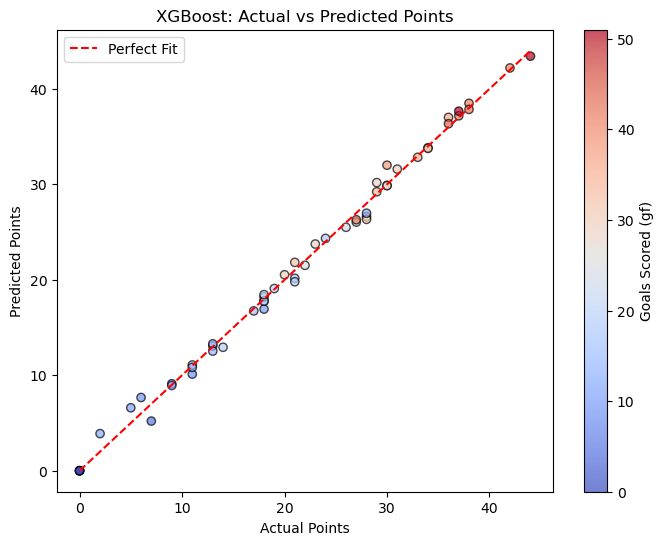

In [34]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(y_test, y_pred_xgb, c=X_test['gf'], cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit")
plt.colorbar(scatter, label='Goals Scored (gf)')
plt.title("XGBoost: Actual vs Predicted Points")
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.legend()
plt.show()